<a href="https://colab.research.google.com/github/Hero0963/data_science/blob/main/data_science_ch06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# exercise_01

# read penguin data
from google.colab import drive
drive.mount('/content/MyGoogleDrive')
import pandas as pd
df=pd.read_csv('/content/MyGoogleDrive/My Drive/Colab Notebooks/Python-for-Titanic/Ch06/penguin.csv')
df.info()

Mounted at /content/MyGoogleDrive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                338 non-null    int64  
 1   Length_cm         315 non-null    float64
 2   Weight_g          329 non-null    float64
 3   Species           338 non-null    object 
 4   Scientific Name   338 non-null    object 
 5   Inspector         338 non-null    object 
 6   Measurement Date  338 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 18.6+ KB


In [2]:
# penguin data cleaning
df=df.drop_duplicates().reset_index(drop=True)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                332 non-null    int64  
 1   Length_cm         309 non-null    float64
 2   Weight_g          323 non-null    float64
 3   Species           332 non-null    object 
 4   Scientific Name   332 non-null    object 
 5   Inspector         332 non-null    object 
 6   Measurement Date  332 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 18.3+ KB


,ID,Length_cm,Weight_g,Species,Scientific Name,Inspector,Measurement Date
0,1,45.0,2847.0,Galapagos penguin,Spheniscus mendiculus,Janet,1990/9/19
1,2,53.0,3625.0,Chinstrap penguin,Pygoscelis antarcticus,Elbert,1991/6/21
2,3,83.0,3600.0,Chinstrap penguin,Pygoscelis antarcticus,Janet,1991/3/17
3,4,72.0,3282.0,Chinstrap penguin,Pygoscelis antarcticus,Antisthenes,1991/3/25
4,5,NaN,5630.0,Gentoo penguin,Pygoscelis papua,Alisha,1990/9/21
...,...,...,...,...,...,...,...
327,334,64.0,3752.0,Chinstrap penguin,Pygoscelis antarcticus,Charpentier,1991/3/8
328,335,45.0,2300.0,Galapagos penguin,Spheniscus mendiculus,Antisthenes,1991/3/11
329,336,53.0,897.0,Little penguin,Eudyptula minor,Janet,1990/9/17
330,337,37.0,812.0,Little penguin,Eudyptula minor,Antisthenes,1990/9/22


In [3]:
species_list=df['Species'].unique().tolist()

for species in species_list:
    filter=df['Species']==species
    m_l=(df[filter]['Length_cm'].mean())
    m_w=(df[filter]['Weight_g'].mean())
    df.loc[filter,'Length_cm']=df.loc[filter,'Length_cm'].fillna(m_l)
    df.loc[filter,'Weight_g']=df.loc[filter,'Weight_g'].fillna(m_w)
  

df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                332 non-null    int64  
 1   Length_cm         332 non-null    float64
 2   Weight_g          332 non-null    float64
 3   Species           332 non-null    object 
 4   Scientific Name   332 non-null    object 
 5   Inspector         332 non-null    object 
 6   Measurement Date  332 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 18.3+ KB


,ID,Length_cm,Weight_g,Species,Scientific Name,Inspector,Measurement Date
0,1,45.000000,2847.0,Galapagos penguin,Spheniscus mendiculus,Janet,1990/9/19
1,2,53.000000,3625.0,Chinstrap penguin,Pygoscelis antarcticus,Elbert,1991/6/21
2,3,83.000000,3600.0,Chinstrap penguin,Pygoscelis antarcticus,Janet,1991/3/17
3,4,72.000000,3282.0,Chinstrap penguin,Pygoscelis antarcticus,Antisthenes,1991/3/25
4,5,87.090909,5630.0,Gentoo penguin,Pygoscelis papua,Alisha,1990/9/21
...,...,...,...,...,...,...,...
327,334,64.000000,3752.0,Chinstrap penguin,Pygoscelis antarcticus,Charpentier,1991/3/8
328,335,45.000000,2300.0,Galapagos penguin,Spheniscus mendiculus,Antisthenes,1991/3/11
329,336,53.000000,897.0,Little penguin,Eudyptula minor,Janet,1990/9/17
330,337,37.000000,812.0,Little penguin,Eudyptula minor,Antisthenes,1990/9/22


In [4]:
s={'Chinstrap penguin':0,'Little penguin':1,'Galapagos penguin':2,'Gentoo penguin':3,}
df['Species']=df['Species'].map(s)
df=df.astype({'Species': 'int'})
df

,ID,Length_cm,Weight_g,Species,Scientific Name,Inspector,Measurement Date
0,1,45.000000,2847.0,2,Spheniscus mendiculus,Janet,1990/9/19
1,2,53.000000,3625.0,0,Pygoscelis antarcticus,Elbert,1991/6/21
2,3,83.000000,3600.0,0,Pygoscelis antarcticus,Janet,1991/3/17
3,4,72.000000,3282.0,0,Pygoscelis antarcticus,Antisthenes,1991/3/25
4,5,87.090909,5630.0,3,Pygoscelis papua,Alisha,1990/9/21
...,...,...,...,...,...,...,...
327,334,64.000000,3752.0,0,Pygoscelis antarcticus,Charpentier,1991/3/8
328,335,45.000000,2300.0,2,Spheniscus mendiculus,Antisthenes,1991/3/11
329,336,53.000000,897.0,1,Eudyptula minor,Janet,1990/9/17
330,337,37.000000,812.0,1,Eudyptula minor,Antisthenes,1990/9/22


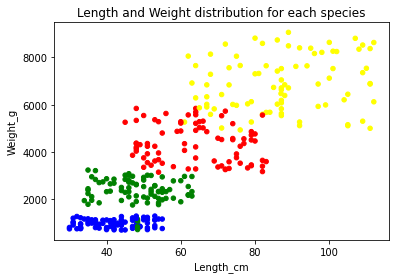

In [6]:
# plot Length_cm-Weight_g -> Species scatter graph
# color list = https://datascientyst.com/full-list-named-colors-pandas-python-matplotlib/

c={ 0:'red', 1:'blue',2:'green',3:'yellow',}
df['colors']=df['Species'].map(c)

df.plot(kind='scatter',x='Length_cm',y='Weight_g',c=df['colors'], title= 'Length and Weight distribution for each species')

In [7]:
df.to_csv('/content/MyGoogleDrive/My Drive/Colab Notebooks/Python_Data_Science/penguin06.csv',index=False)